# Logistic Regression

Chapter 16 of _Data Science from Scratch_

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math
import os
import random
import sys
from functools import partial, reduce

In [4]:
book_dir = '/Users/CBare/Documents/projects/data-science-from-scratch'
sys.path.extend(os.path.join(book_dir, 'chapter_{:02d}'.format(i)) for i in [3,4,5,6,7,8,16])

In [5]:
from stats import mean, median, de_mean, standard_deviation, correlation
from gradient_descent import minimize_stochastic, maximize_stochastic, maximize_batch
from vector import dot, vector_add
from normal import normal_cdf
from matrix import make_matrix, get_column, shape, matrix_multiply
from logistic_regression import *

Data from https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3/logistic_regression.py#L46

In [6]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]

In [7]:
x = [(1,) + row[:2] for row in data]
y = [row[2] for row in data]

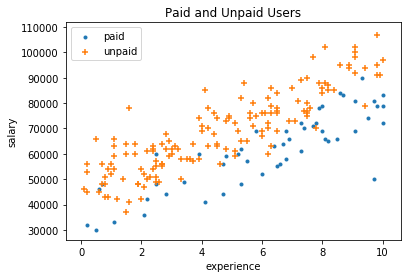

In [8]:
plt.scatter([row[0] for row in data if row[2]],
            [row[1] for row in data if row[2]],
            marker='.', label='paid')
plt.scatter([row[0] for row in data if not row[2]],
            [row[1] for row in data if not row[2]],
            marker='+', label='unpaid')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.title('Paid and Unpaid Users')
plt.show()

$ paid account = \beta_0 + \beta_1 experience + \beta_2 salary + ε $

In [9]:
rescaled_x = rescale(x)
beta = estimate_beta(rescaled_x, y) # [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_x]

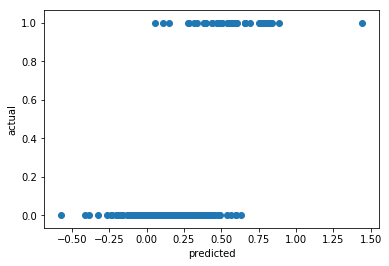

In [10]:
plt.scatter(predictions, y)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

## The Logistic Function

In [11]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

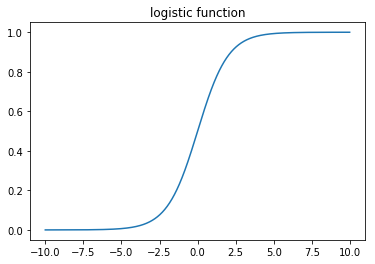

In [12]:
z = [zi/50 - 10 for zi in range(1000)]
plt.plot(z, [logistic(zi) for zi in z])
plt.title('logistic function')
plt.show()

In [13]:
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i==1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

In [14]:
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
        for x_i, y_i in zip(x, y))

In [15]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """here i is the index of the data point, j the index of the derivative"""
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

In [16]:
def logistic_log_gradient_i(x_i, y_i, beta):
    """the gradient of the log likelihood corresponding to the ith data point"""
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

In [17]:
def logistic_log_gradient(x, y, beta):
    return reduce(vector_add,
        [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])

In [18]:
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_x, y, 0.33)

# want to maximize log likelihood on the training data
fn = partial(logistic_log_likelihood, x_train, y_train)
gradient_fn = partial(logistic_log_gradient, x_train, y_train)

# pick a random starting point
beta_0 = [random.random() for _ in range(3)] # and maximize using gradient descent
beta_hat, training_errs = maximize_batch(fn, gradient_fn, beta_0)

In [19]:
beta_hat

[-1.9061972272093648, 4.053123658820201, -3.8789401596847526]

In [20]:
beta_hat = maximize_stochastic(logistic_log_likelihood_i,
                               logistic_log_gradient_i,
                               x_train, y_train, beta_0)

In [21]:
beta_hat

[-1.9042766078873332, 4.047489956690998, -3.8751362233682034]

## Goodness of Fit

In [22]:
true_positives = false_positives = true_negatives = false_negatives = 0
for x_i, y_i in zip(x_test, y_test):
    predict = logistic(dot(beta_hat, x_i))

    # TP: paid and we predict paid
    if y_i == 1 and predict >= 0.5:
        true_positives += 1

    # FN: paid and we predict unpaid
    elif y_i == 1:
        false_negatives += 1

    # FP: unpaid and we predict paid
    elif predict >= 0.5:
        false_positives += 1

    # TN: unpaid and we predict unpaid
    else:
        true_negatives += 1

In [23]:
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
precision, recall

(0.9333333333333333, 0.8235294117647058)

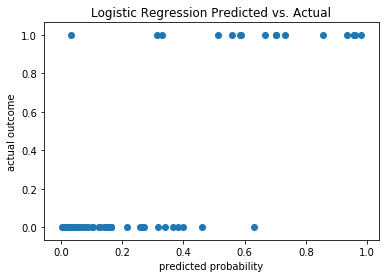

In [24]:
predictions = [logistic(dot(beta_hat, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test)
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

## The Decision Boundary

### Unscaling the coefficients

First we need to unscale the coefficients. The book gives them, but let's figure out how those are computed.

In [25]:
beta_hat_unscaled = [7.61, 1.42, -0.000249]

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

$ y = \beta_0 + \beta_1 (xus_1 - \mu_1)/\sigma_1  + \beta_2 (xus_2 - \mu_2)/\sigma_2 $

$ y = (\beta_0 - \beta_1\mu_1/\sigma_1 - \beta_2\mu_2/\sigma_2) + \beta_1/\sigma_1 xus_1  + \beta_2/\sigma_2 xus_2 $


In [26]:
beta_hat

[-1.9042766078873332, 4.047489956690998, -3.8751362233682034]

In [27]:
mu_1 = mean([xi[1] for xi in x])
sig_1 = standard_deviation([xi[1] for xi in x])

mu_2 = mean([xi[2] for xi in x])
sig_2 = standard_deviation([xi[2] for xi in x])

In [28]:
beta_hat_unscaled[0] = beta_hat[0] - (beta_hat[1]*mu_1)/sig_1 - (beta_hat[2]*mu_2)/sig_2
beta_hat_unscaled[0]

7.627078237176647

In [29]:
beta_hat_unscaled[1] = beta_hat[1]/sig_1
beta_hat_unscaled[1]

1.4214821135643616

In [30]:
beta_hat_unscaled[2] = beta_hat[2]/sig_2
beta_hat_unscaled[2]

-0.00024941412966504736

### Compute the decision boundary

The decision boundary is where the dot product of $\beta$ and _x_ is zero.

$ \beta \cdot x = 0 $

$ \beta_1 x_1 + \beta_2 x_2 = -\beta_0 $

...or the line defined by:

$ x_2 = - \beta_1/\beta_2 x_2 - \beta_0/\beta_2 $

In [31]:
x_db = [xi/2 for xi in range(21)]
y_db = [(-beta_hat_unscaled[1]/beta_hat_unscaled[2]*xi - beta_hat_unscaled[0]/beta_hat_unscaled[2])
        for xi in x_db]

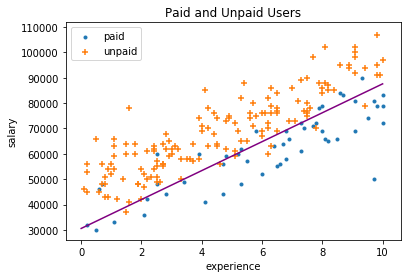

In [32]:
plt.scatter([row[0] for row in data if row[2]],
            [row[1] for row in data if row[2]],
            marker='.', label='paid')
plt.scatter([row[0] for row in data if not row[2]],
            [row[1] for row in data if not row[2]],
            marker='+', label='unpaid')
plt.plot(x_db, y_db, 'purple')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.title('Paid and Unpaid Users')
plt.show()